# Making a ML and DL model for a hotel reservation dataset
### [Click Here for the Dataset](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)

### Importing the necessary libraries and dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import VotingClassifier
from keras import Sequential
from keras.layers import Dense
from keras.losses import BinaryCrossentropy
from keras.losses import MeanSquaredError
from keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score
import keras
%matplotlib inline

In [2]:
# Loading the dataset
data = pd.read_csv('Hotel Reservations.csv')
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


#### Getting a better understanding of the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
data['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

In [5]:
data['market_segment_type'].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [6]:
data['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

### Preprocessing

In [7]:
data.drop('Booking_ID', axis=1, inplace=True)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [8]:
encoder = LabelEncoder()

In [9]:
# Turning the object values to meaningful numbers using LabelEncoder
data[['type_of_meal_plan','room_type_reserved',
      'market_segment_type']] = data[[
          'type_of_meal_plan','room_type_reserved','market_segment_type',]].apply(encoder.fit_transform)

mapping = {'Not_Canceled':0,'Canceled':1}
data['booking_status'] = data['booking_status'].map(mapping)

data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,0
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,0
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,1
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,1
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,1


In [10]:
scaler = StandardScaler()

In [11]:
# Seperating the dataset into X and y. Then scaling X with StandardScaler and spliting X and y with train_test_split
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Getting the most important features using RandomForest

In [12]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rfc.fit(X_train, y_train)
importances = rfc.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")

important_columns_ordered = []

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)) --> (%s)" % (f + 1, indices[f], importances[indices[f]], data.columns[indices[f]]))
    important_columns_ordered.append(data.columns[indices[f]])

Feature ranking:
1. feature 7 (0.449703)) --> (lead_time)
2. feature 16 (0.169777)) --> (no_of_special_requests)
3. feature 15 (0.103752)) --> (avg_price_per_room)
4. feature 11 (0.088201)) --> (market_segment_type)
5. feature 8 (0.063570)) --> (arrival_year)
6. feature 9 (0.052552)) --> (arrival_month)
7. feature 0 (0.017291)) --> (no_of_adults)
8. feature 2 (0.009793)) --> (no_of_weekend_nights)
9. feature 12 (0.008636)) --> (repeated_guest)
10. feature 3 (0.008558)) --> (no_of_week_nights)
11. feature 4 (0.007169)) --> (type_of_meal_plan)
12. feature 5 (0.006473)) --> (required_car_parking_space)
13. feature 14 (0.005531)) --> (no_of_previous_bookings_not_canceled)
14. feature 6 (0.004004)) --> (room_type_reserved)
15. feature 10 (0.003717)) --> (arrival_date)
16. feature 1 (0.000996)) --> (no_of_children)
17. feature 13 (0.000278)) --> (no_of_previous_cancellations)


##### Ploting the data for a better understanding

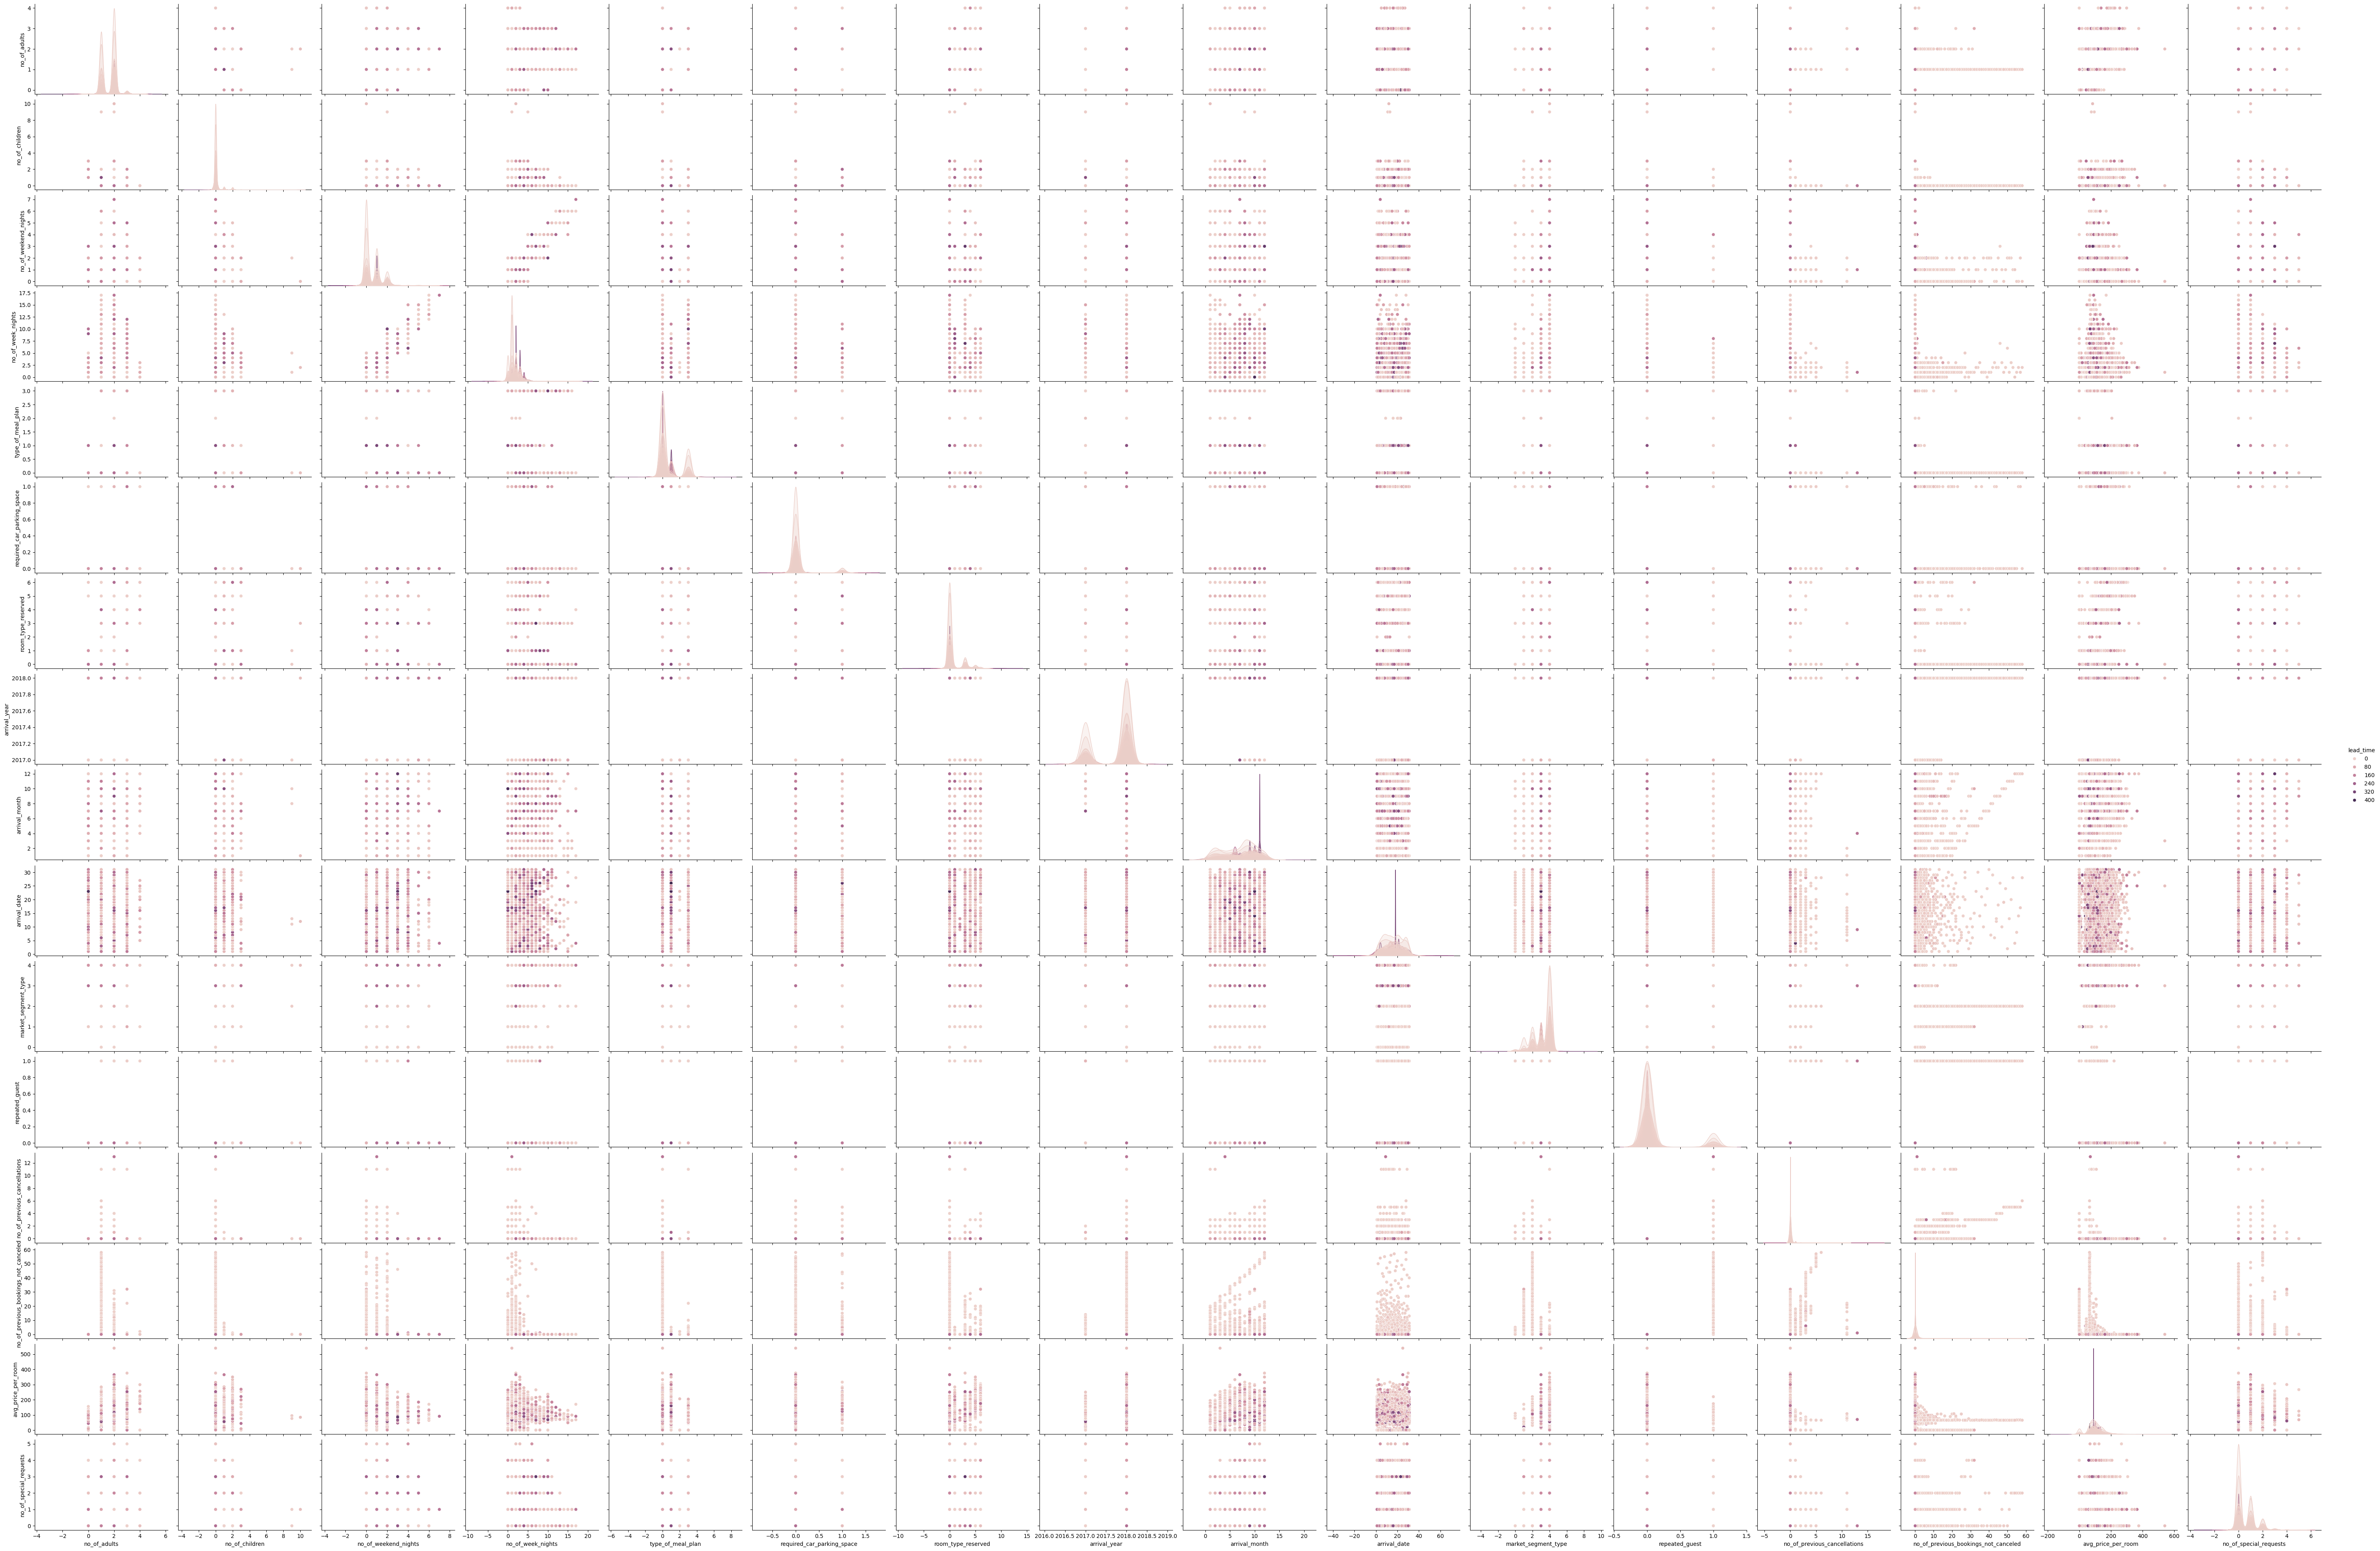

In [13]:
sns.pairplot(data.drop('booking_status', axis=1), hue='lead_time', aspect=1.5)
plt.show()

### Evaluating different classification algorithms

In [14]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
    Results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring= 'accuracy')
    results.append(Results)
    names.append(name)

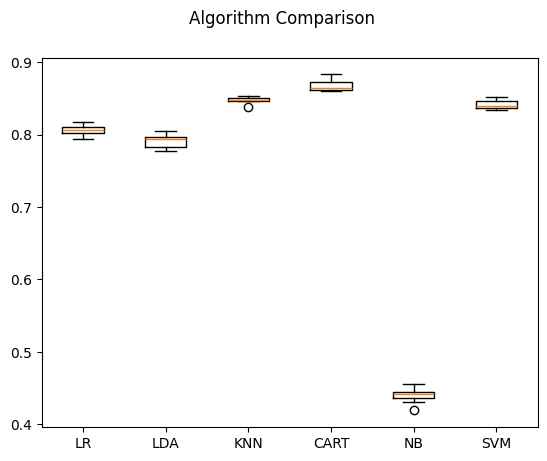

In [15]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Modeling using KNN with various number of neighbors

In [16]:
ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for k in range(1, ks):
    neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[k-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[k-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.85070019, 0.84992833, 0.85081045, 0.8497078 , 0.85092072,
       0.849377  , 0.84948726, 0.84651009, 0.84761275])

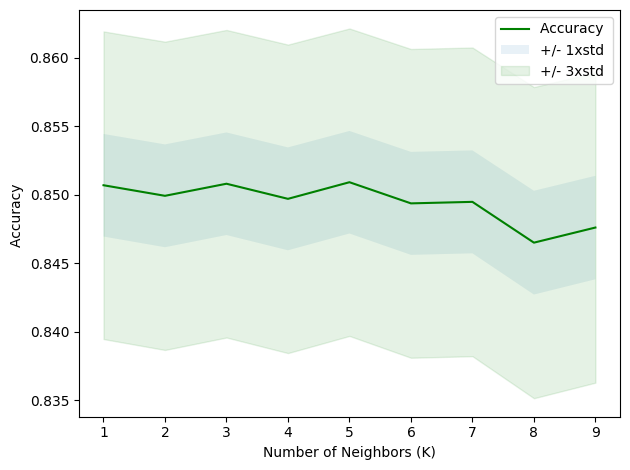

In [17]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

### 3 neighbors looks quite well for the algorithm

In [18]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

In [19]:
yhat = knn.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [20]:
print('train accuracy is:', metrics.accuracy_score(y_train, knn.predict(X_train)))
print('test accuracy is:', metrics.accuracy_score(y_test, yhat))

train accuracy is: 0.9153863118429758
test accuracy is: 0.8508104531921932


In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[2271  755]
 [ 598 5445]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      6043
           1       0.79      0.75      0.77      3026

    accuracy                           0.85      9069
   macro avg       0.83      0.83      0.83      9069
weighted avg       0.85      0.85      0.85      9069



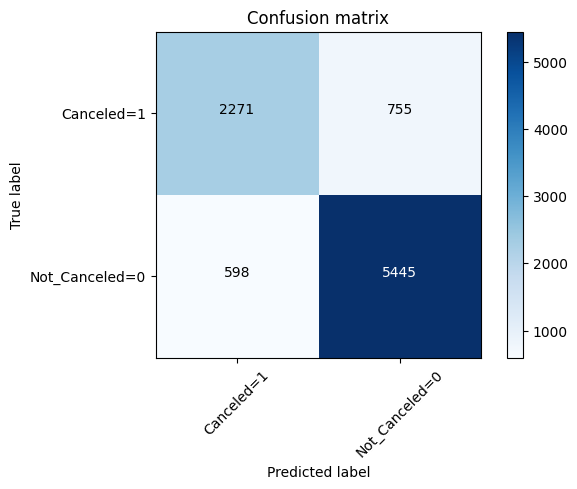

In [22]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Canceled=1','Not_Canceled=0'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, yhat))

### Applying KNN, this time with feature selection to know whether this helps or not

In [23]:
least_importatant_columns = important_columns_ordered[10:]
important_data = data.drop(least_importatant_columns, axis=1)
important_data.head()
# the dataset with 10 most important features

,no_of_adults,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,224,2017,10,3,0,65.00,0,0
1,2,2,3,5,2018,11,4,0,106.68,1,0
2,1,2,1,1,2018,2,4,0,60.00,0,1
3,2,0,2,211,2018,5,4,0,100.00,0,1
4,2,1,1,48,2018,4,4,0,94.50,0,1


In [24]:
# Repeating all we did with the new dataset
X_important = important_data.iloc[:,:-1].values
y_important = important_data.iloc[:,-1].values

X_important = scaler.fit_transform(X_important)
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_important, y_important, test_size=0.25, random_state=42)

In [25]:
important_data['booking_status'].value_counts()

booking_status
0    24390
1    11885
Name: count, dtype: int64

In [26]:
ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for k in range(1, ks):
    neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train_imp, y_train_imp)
    yhat_imp = neigh.predict(X_test_imp)
    mean_acc[k-1] = metrics.accuracy_score(y_test_imp, yhat_imp)
    
    std_acc[k-1]=np.std(yhat_imp==y_test_imp)/np.sqrt(yhat_imp.shape[0])
    
mean_acc

array([0.85, 0.85, 0.85, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86])

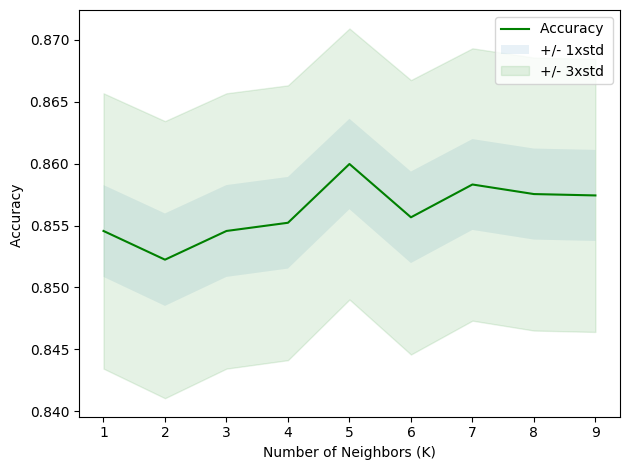

In [27]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [28]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_imp, y_train_imp)

yhat_imp = knn.predict(X_test_imp)

print('train accuracy is:', metrics.accuracy_score(y_train_imp, knn.predict(X_train_imp)))
print('test accuracy is:', metrics.accuracy_score(y_test_imp, yhat_imp))

train accuracy is: 0.8981107108726016
test accuracy is: 0.8599625096482523


Confusion matrix, without normalization
[[2278  748]
 [ 522 5521]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      6043
           1       0.81      0.75      0.78      3026

    accuracy                           0.86      9069
   macro avg       0.85      0.83      0.84      9069
weighted avg       0.86      0.86      0.86      9069



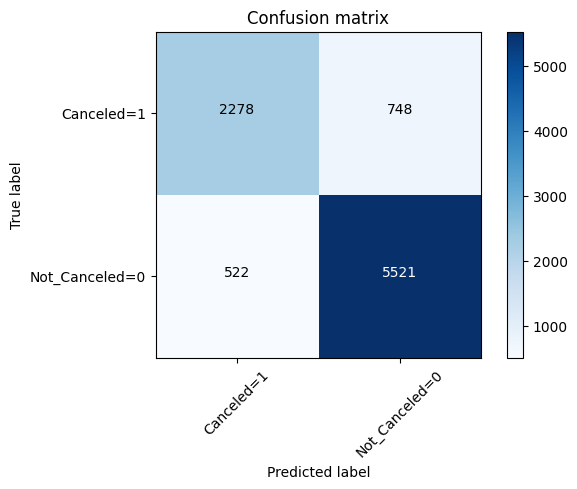

In [29]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_imp, yhat_imp, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Canceled=1','Not_Canceled=0'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test_imp, yhat_imp))

### It seems that feature selection is not that essential and the accuracy won't chnage

### Modeling using Logestic Regression

In [30]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [31]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

Confusion matrix, without normalization
[[1835 1191]
 [ 580 5463]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      6043
           1       0.76      0.61      0.67      3026

    accuracy                           0.80      9069
   macro avg       0.79      0.76      0.77      9069
weighted avg       0.80      0.80      0.80      9069



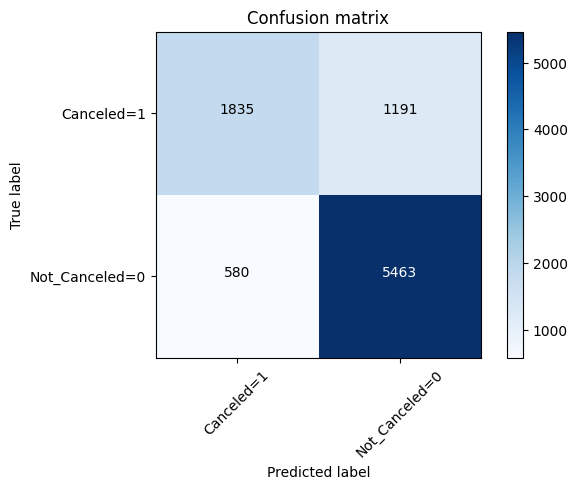

In [32]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Canceled=1','Not_Canceled=0'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, yhat))

### Modeling using SVM

In [33]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [34]:
yhat = clf.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

Confusion matrix, without normalization
[[2033  993]
 [ 472 5571]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      6043
           1       0.81      0.67      0.74      3026

    accuracy                           0.84      9069
   macro avg       0.83      0.80      0.81      9069
weighted avg       0.84      0.84      0.83      9069



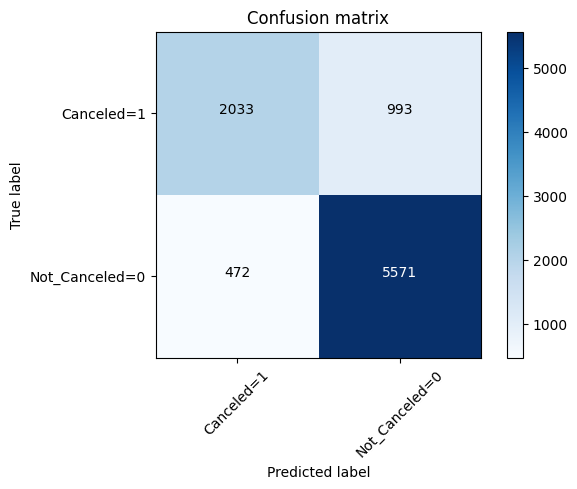

In [35]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Canceled=1','Not_Canceled=0'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, yhat))

### Modeling using Decision Tree

In [36]:
tree = DecisionTreeClassifier(criterion="gini", max_depth = 4)
tree # it shows the default parameters

DecisionTreeClassifier(max_depth=4)

In [37]:
tree.fit(X_train, y_train)

yhat = tree.predict(X_test)

Confusion matrix, without normalization
[[1900 1126]
 [ 529 5514]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      6043
           1       0.78      0.63      0.70      3026

    accuracy                           0.82      9069
   macro avg       0.81      0.77      0.78      9069
weighted avg       0.81      0.82      0.81      9069



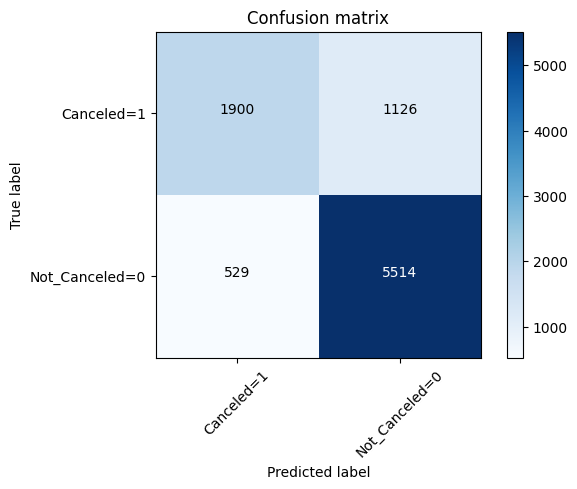

In [38]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Canceled=1','Not_Canceled=0'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, yhat))

### Applying a voting classifier in order to reach a better accuracy with KNN, RandomForest, and SVM

In [39]:
KNN = KNeighborsClassifier(n_neighbors=3)
RF = RandomForestClassifier()
SVM = SVC()
voting_clf = VotingClassifier(
 estimators=[('knn', KNN), ('rf', RF), ('svc', SVM)],
 voting='hard'
 )
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [40]:
for clf in (KNN, RF, SVM, voting_clf):
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, yhat))

KNeighborsClassifier 0.8508104531921932
RandomForestClassifier 0.9036277428602933
SVC 0.8384606902635351
VotingClassifier 0.8871981475355607


In [41]:
yhat = voting_clf.predict(X_test)

Confusion matrix, without normalization
[[2354  672]
 [ 351 5692]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6043
           1       0.87      0.78      0.82      3026

    accuracy                           0.89      9069
   macro avg       0.88      0.86      0.87      9069
weighted avg       0.89      0.89      0.89      9069



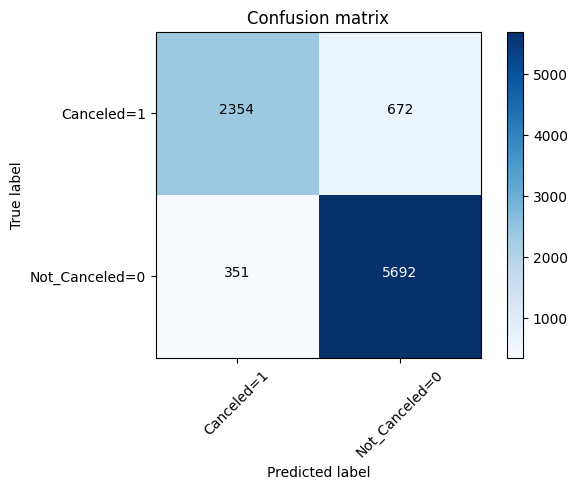

In [42]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Canceled=1','Not_Canceled=0'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, yhat))

### Modeling using a neural network

In [43]:
model = Sequential([
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(loss=BinaryCrossentropy())

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
851/851 [==============================] - 1s 756us/step - loss: 0.4495
Epoch 2/100
851/851 [==============================] - 1s 741us/step - loss: 0.3993
Epoch 3/100
851/851 [==============================] - 1s 734us/step - loss: 0.3864
Epoch 4/100
851/851 [==============================] - 1s 739us/step - loss: 0.3771
Epoch 5/100
851/851 [==============================] - 1s 750us/step - loss: 0.3701
Epoch 6/100
851/851 [==============================] - 1s 752us/step - loss: 0.3651
Epoch 7/100
851/851 [==============================] - 1s 736us/step - loss: 0.3613
Epoch 8/100
851/851 [==============================] - 1s 728us/step - loss: 0.3576
Epoch 9/100
851/851 [==============================] - 1s 727us/step - loss: 0.3551
Epoch 10/100
851/851 [==============================] - 1s 735us/step - loss: 0.3523
Epoch 11/100
851/851 [==============================] - 1s 728us/step - loss: 0.3497
Epoch 12/100
851/851 [==============================] - 1s 758us/step - lo

In [44]:
yhat = model.predict(X_test)
yhat

284/284 [==============================] - 0s 611us/step


array([[1.78e-05],
       [7.65e-02],
       [1.03e-01],
       ...,
       [1.21e-05],
       [8.75e-01],
       [1.21e-01]], dtype=float32)

In [45]:
# Defining a function for converting predictions to binary
def my_func(x):
    if x > 0.5:
        return 1
    else:
        return 0
    
my_vectorized_func = np.vectorize(my_func)
result = my_vectorized_func(yhat)

result = result.flatten()
yhat = result

Confusion matrix, without normalization
[[2270  756]
 [ 506 5537]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6043
           1       0.82      0.75      0.78      3026

    accuracy                           0.86      9069
   macro avg       0.85      0.83      0.84      9069
weighted avg       0.86      0.86      0.86      9069



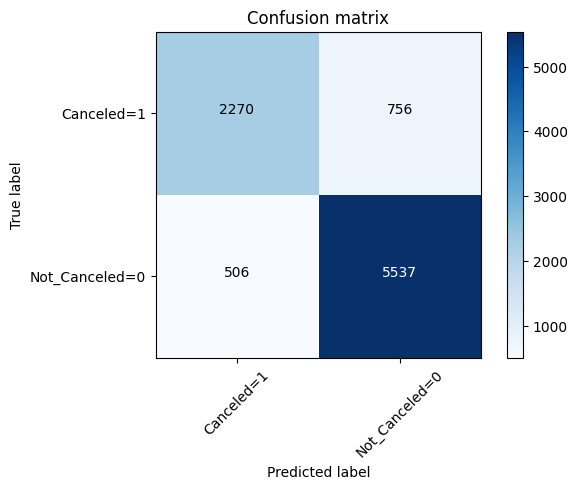

In [46]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Canceled=1','Not_Canceled=0'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, yhat))

#### Using the neural network this time with Adam optimizer

In [47]:
model = Sequential([
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adam(),
              loss= keras.losses.BinaryCrossentropy(from_logits=True))

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5820: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


851/851 [==============================] - 1s 862us/step - loss: 0.4651
Epoch 2/100
851/851 [==============================] - 1s 781us/step - loss: 0.4021
Epoch 3/100
851/851 [==============================] - 1s 818us/step - loss: 0.3902
Epoch 4/100
851/851 [==============================] - 1s 819us/step - loss: 0.3820
Epoch 5/100
851/851 [==============================] - 1s 856us/step - loss: 0.3757
Epoch 6/100
851/851 [==============================] - 1s 842us/step - loss: 0.3710
Epoch 7/100
851/851 [==============================] - 1s 873us/step - loss: 0.3658
Epoch 8/100
851/851 [==============================] - 1s 809us/step - loss: 0.3625
Epoch 9/100
851/851 [==============================] - 1s 850us/step - loss: 0.3591
Epoch 10/100
851/851 [==============================] - 1s 870us/step - loss: 0.3560
Epoch 11/100
851/851 [==============================] - 1s 789us/step - loss: 0.3533
Epoch 12/100
851/851 [==============================] - 1s 768us/step - loss: 0.3509
E

In [48]:
yhat = model.predict(X_test)

def my_func(x):
    # Define your function here
    if x > 0.5:
        return 1
    else:
        return 0
    
my_vectorized_func = np.vectorize(my_func)
result = my_vectorized_func(yhat)

result = result.flatten()
yhat = result

284/284 [==============================] - 0s 597us/step


Confusion matrix, without normalization
[[2273  753]
 [ 532 5511]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      6043
           1       0.81      0.75      0.78      3026

    accuracy                           0.86      9069
   macro avg       0.85      0.83      0.84      9069
weighted avg       0.86      0.86      0.86      9069



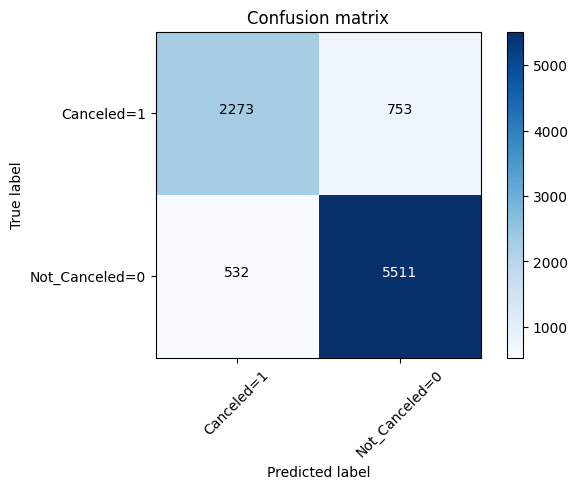

In [49]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Canceled=1','Not_Canceled=0'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, yhat))

## It seems that the voting classifier and the neural network using Adam optimizer reached to quite better accuracy in both train and test segments!